In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mca import MCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
#load data
housing_data = pd.read_csv('/Users/pradeepthi/Documents/Winter/Prefessor Jorn ML & DDR/ML_DDR/DDR - BAX - 442/Final_Project/house-prices-advanced-regression-techniques/housing_data.csv')
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2915,160,RM,21,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,2916,160,RM,21,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,2917,20,RL,160,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2918,2918,85,RL,62,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# Exploring the Housing Data

In [3]:
#check for duplicates
housing_data.duplicated().sum()

0

Handle missing data:

In [4]:
#check for missing values
columns_with_missing = housing_data.isnull().any()
columns_with_missing

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

In [5]:
# replace NA values in numerical columns with column means
num_cols = housing_data.select_dtypes(include=np.number).columns
housing_data[num_cols] = housing_data[num_cols].fillna(housing_data[num_cols].mean())

In [6]:
# replace NA values in string columns with the most common value in the column
str_cols = housing_data.select_dtypes(include='object').columns
for col in str_cols:
    housing_data[col].fillna(housing_data[col].mode()[0], inplace=True)

In [7]:
# check for columns with NA values
print(housing_data.columns[housing_data.isna().any()].tolist())

[]


In [8]:
# Get summary statistics for numerical columns
num_cols = housing_data.select_dtypes(include='number').columns
print(housing_data[num_cols].describe())
#housing_data.describe()

           SalePrice
count    2920.000000
mean   180921.195890
std     56164.709491
min     34900.000000
25%    163000.000000
50%    180921.195890
75%    180921.195890
max    755000.000000


In [9]:
# Get summary statistics for categorical columns
cat_cols = housing_data.select_dtypes(include='object').columns
print(housing_data[cat_cols].describe())

          Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
count   2920       2920     2920        2920    2920   2920  2920     2920   
unique  2920         17        6         129    1952      3     3        5   
top        1         20       RL          60    9600   Pave  Grvl      Reg   
freq       1       1079     2269         762      44   2907  2841     1859   

       LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
count         2920      2920  ...        2920     2920   2920   2920   
unique           5         3  ...         122       15      4      5   
top            Lvl    AllPub  ...           0        0     Ex  MnPrv   
freq          2622      2918  ...        2663     2906   2913   2677   

       MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
count         2920    2920   2920   2920     2920          2920  
unique           5      39     13      6       10             7  
top           Shed       0      6   2007       WD 

In [10]:
print(housing_data['SalePrice'].describe())

count      2920.000000
mean     180921.195890
std       56164.709491
min       34900.000000
25%      163000.000000
50%      180921.195890
75%      180921.195890
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
#Find the correlation between categorical variables:

#df = housing_data

# Select only the categorical variables
#cat_cols = df.select_dtypes(include=['object']).columns

# Perform One-Hot Encoding
#enc = OneHotEncoder(sparse=False)
#encoded_df = pd.DataFrame(enc.fit_transform(df[cat_cols]))

# Add column names to the encoded dataframe
#encoded_df.columns = enc.get_feature_names(cat_cols)

# Concatenate the encoded dataframe with the original dataframe
#df_encoded = pd.concat([df, encoded_df], axis=1)

# Calculate the correlation matrix
#corr_matrix = df_encoded.corr()

# Select only the correlations of the SalePrice variable
#corr_SalePrice = corr_matrix['SalePrice']

# Display the correlations in descending order
#print(corr_SalePrice.sort_values(ascending=False))


# Check distribution of the data

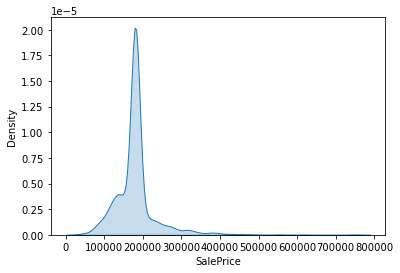

In [11]:
df = housing_data

# Create the density plot
sns.kdeplot(df['SalePrice'], shade=True)
plt.show()


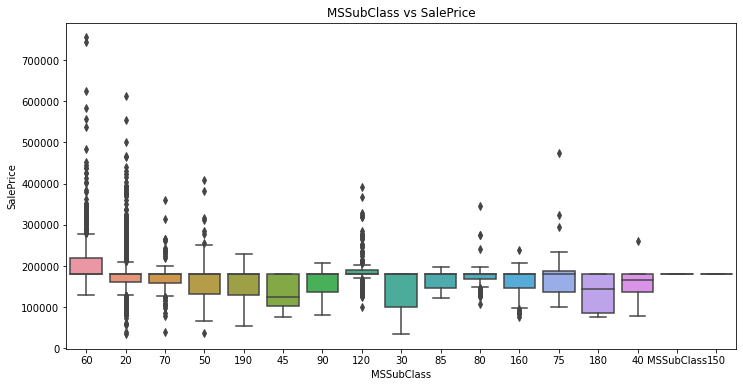

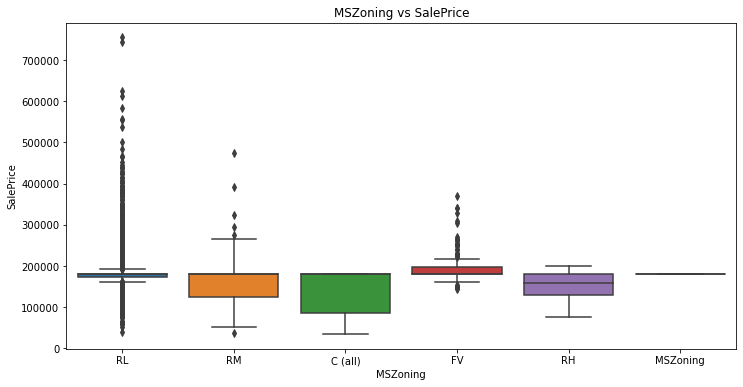

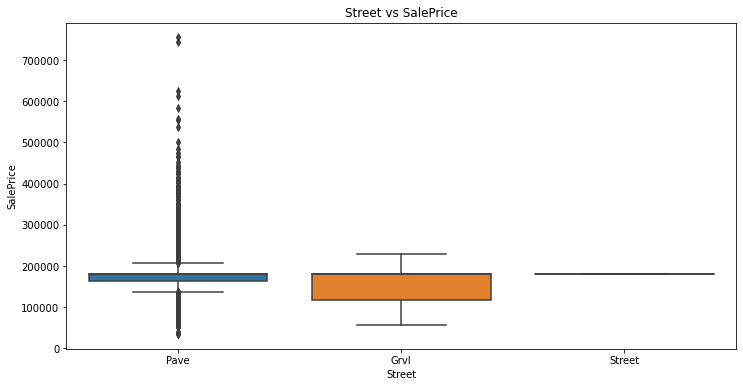

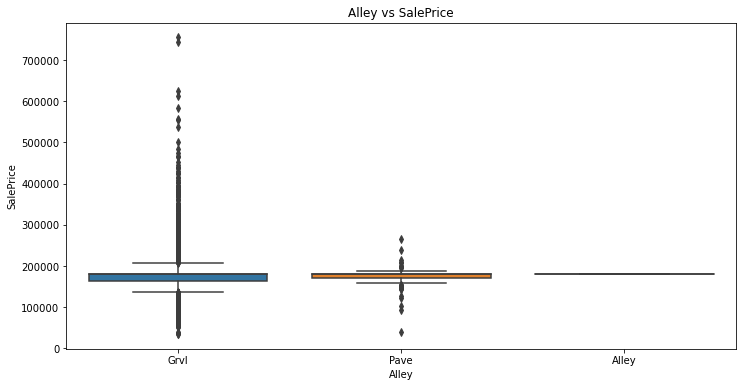

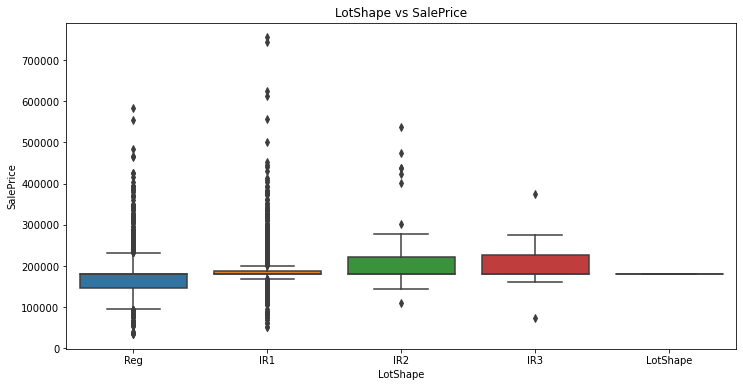

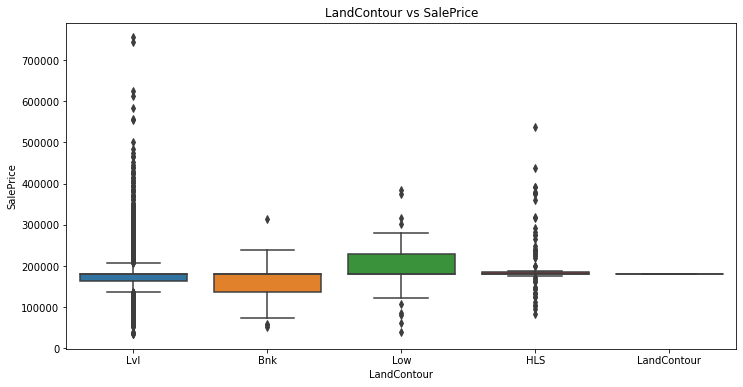

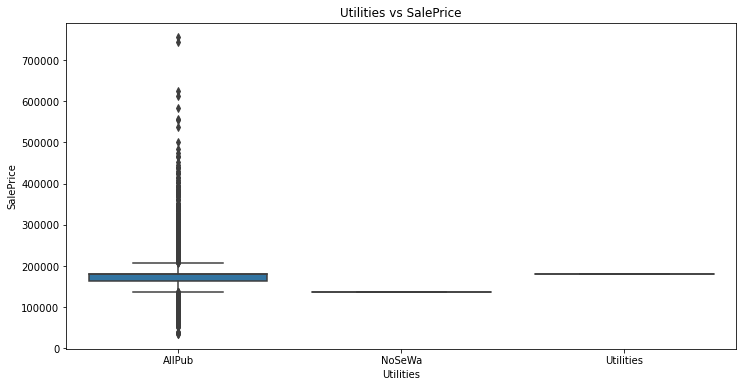

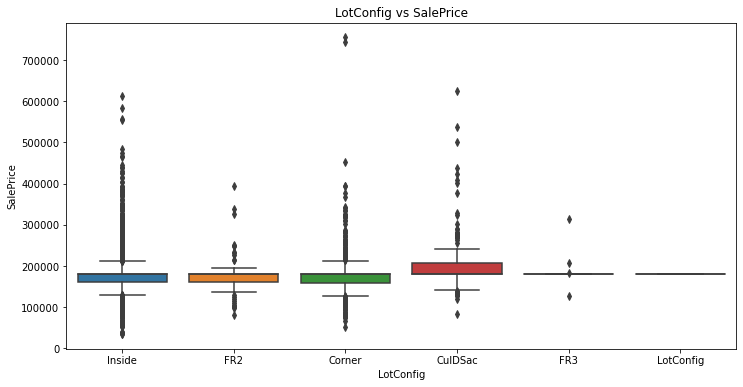

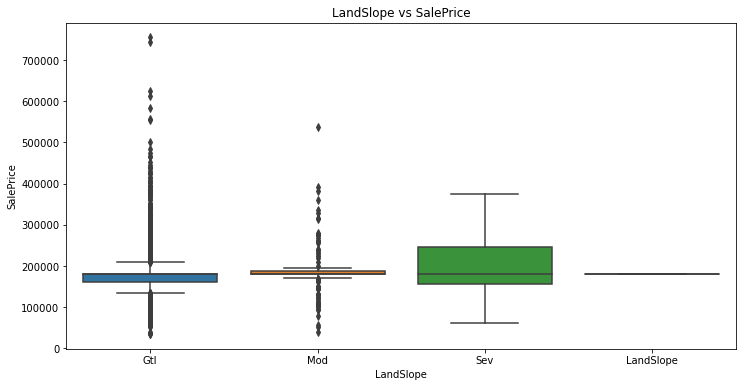

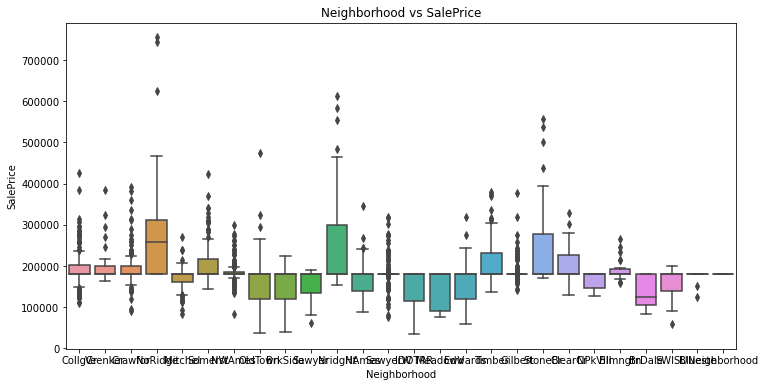

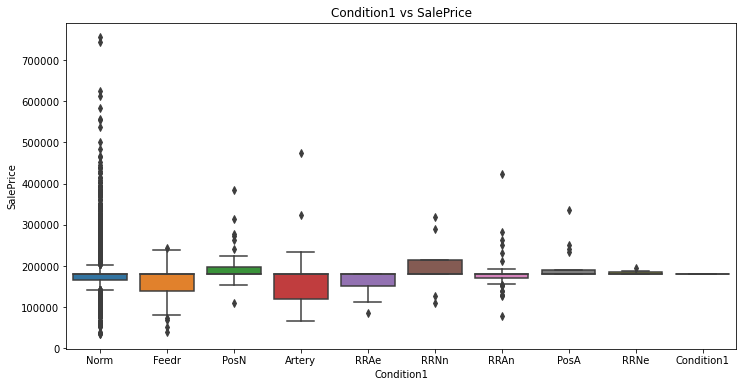

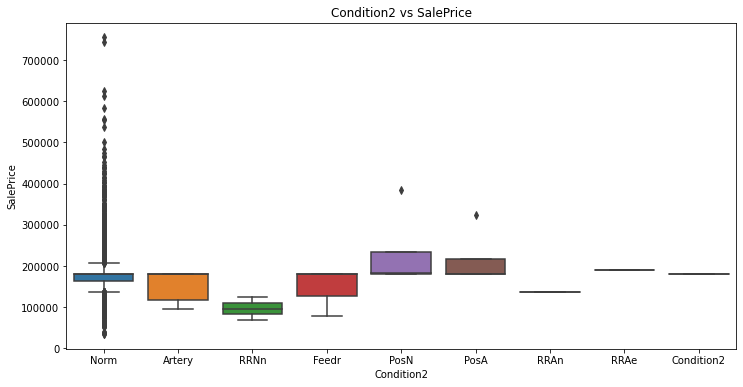

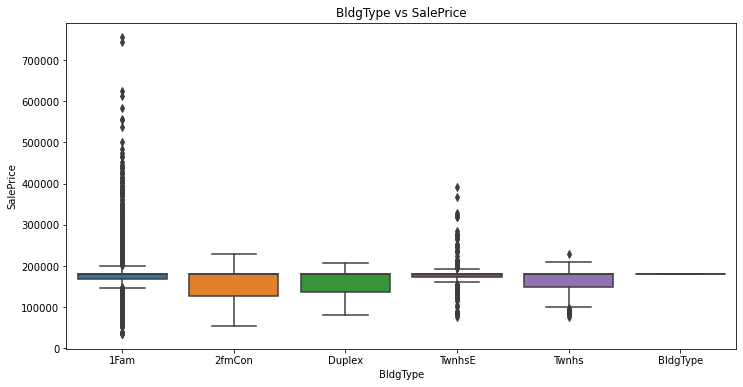

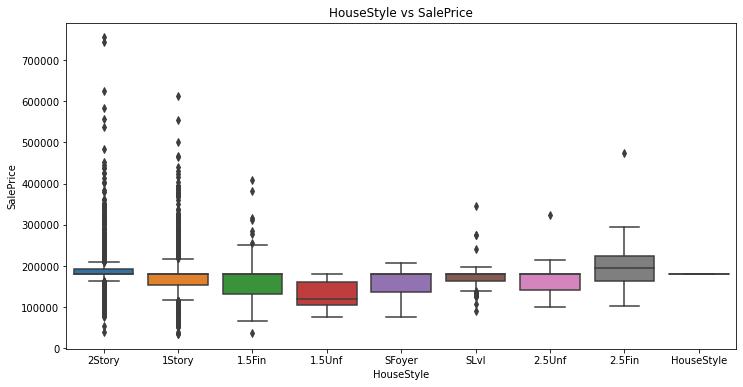

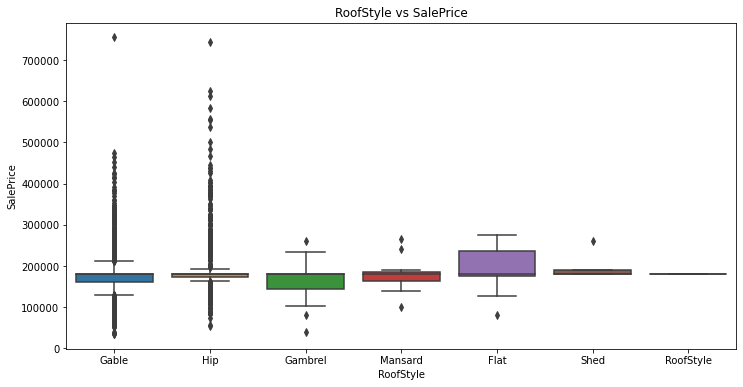

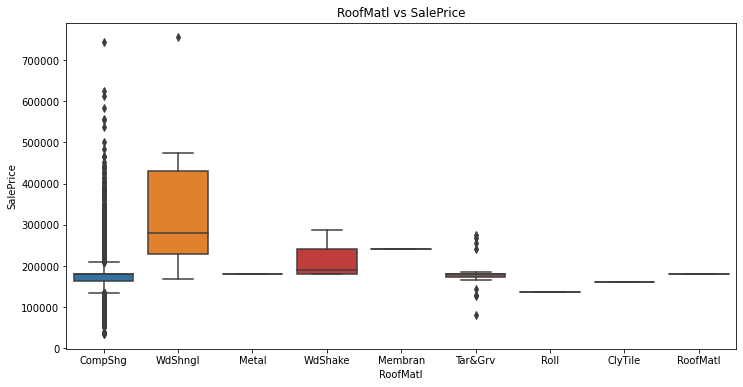

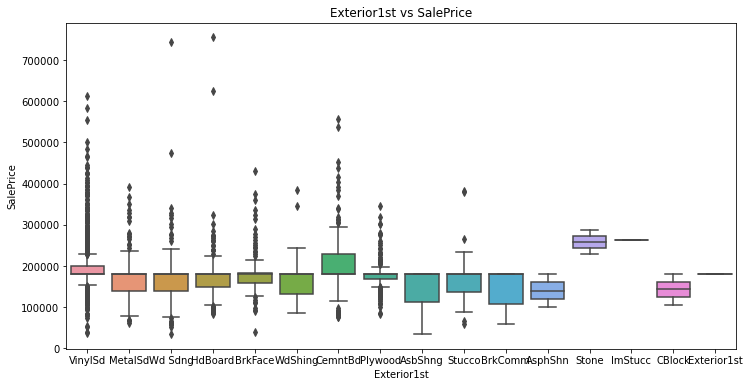

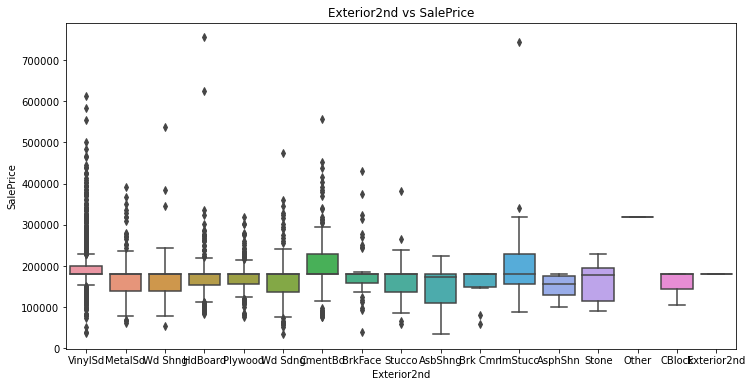

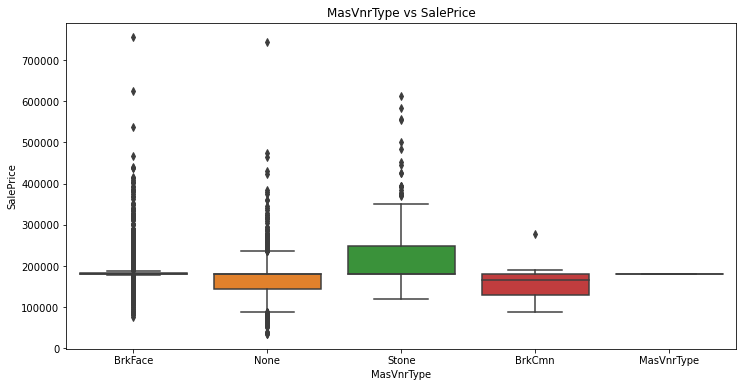

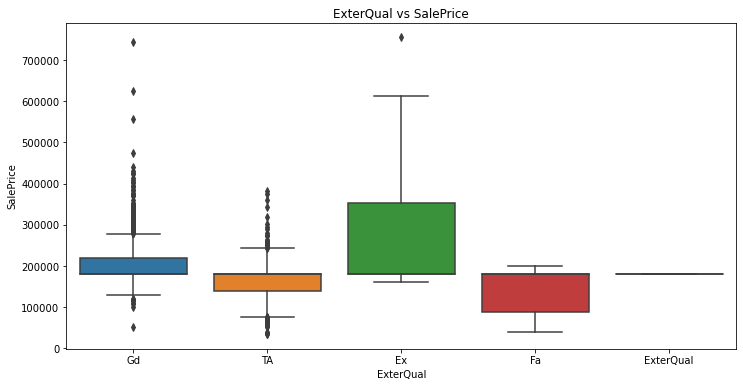

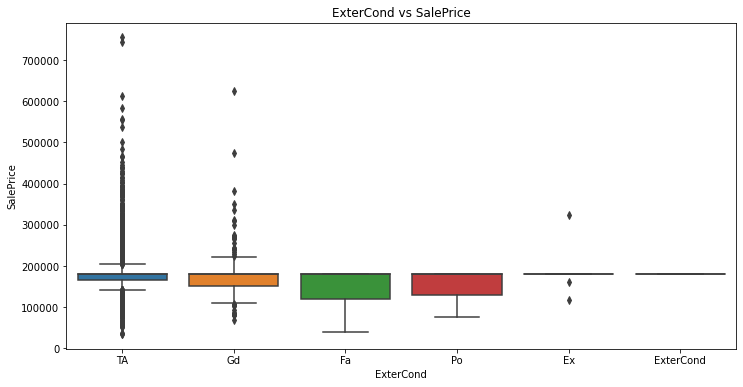

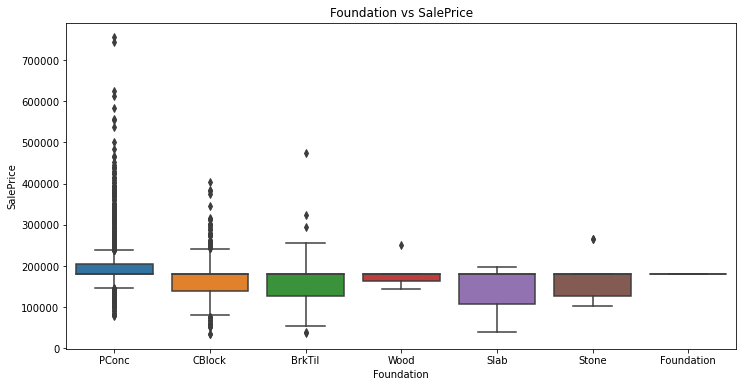

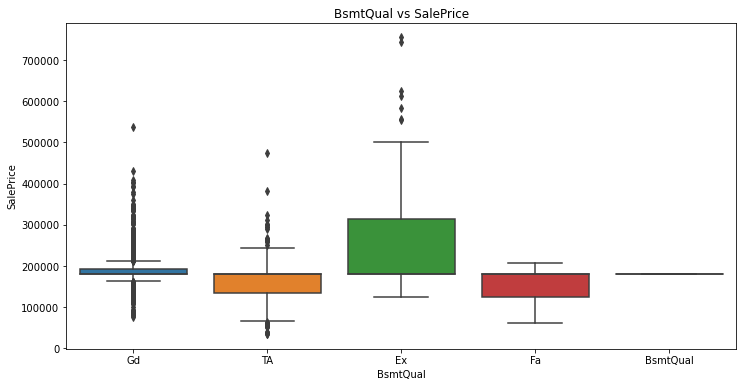

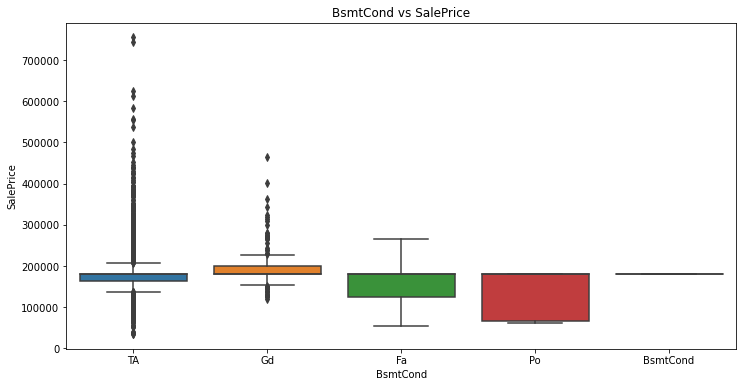

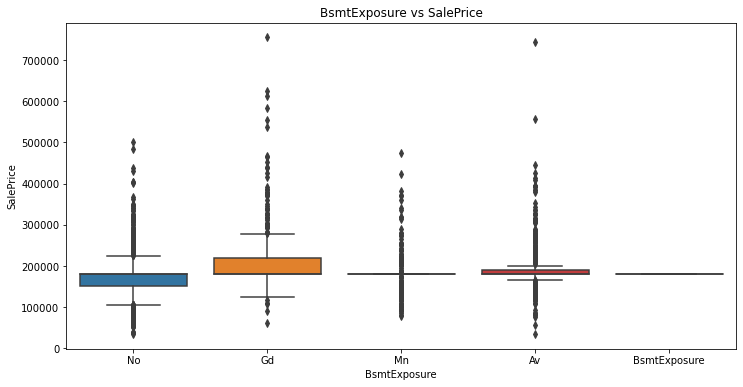

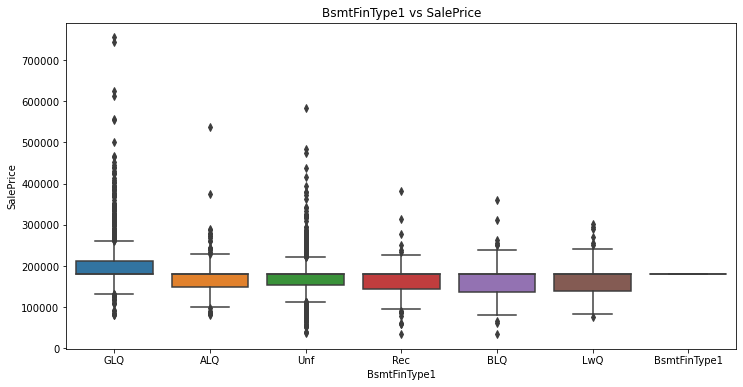

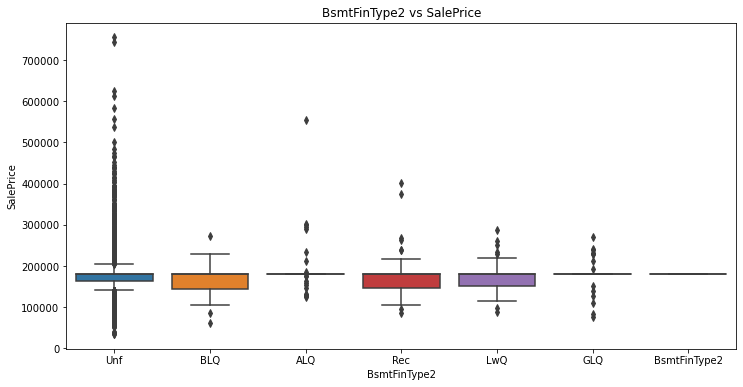

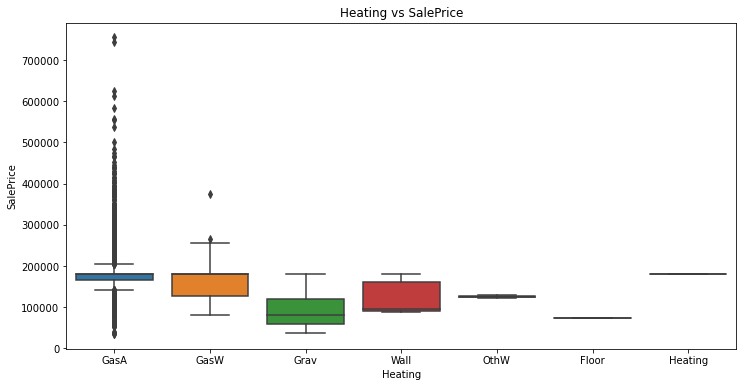

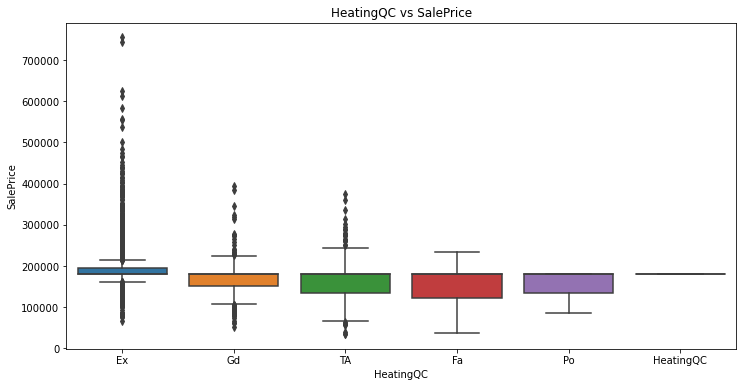

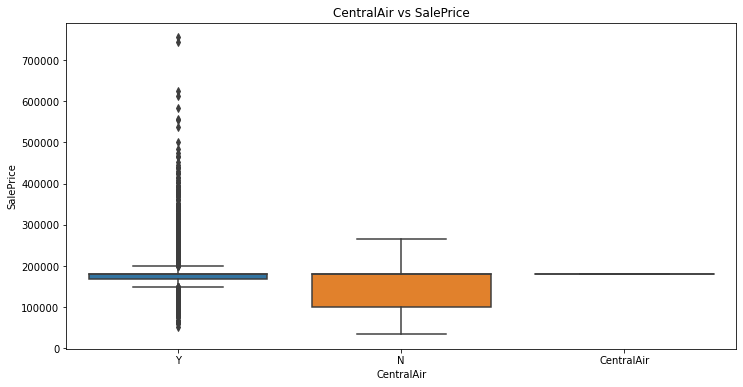

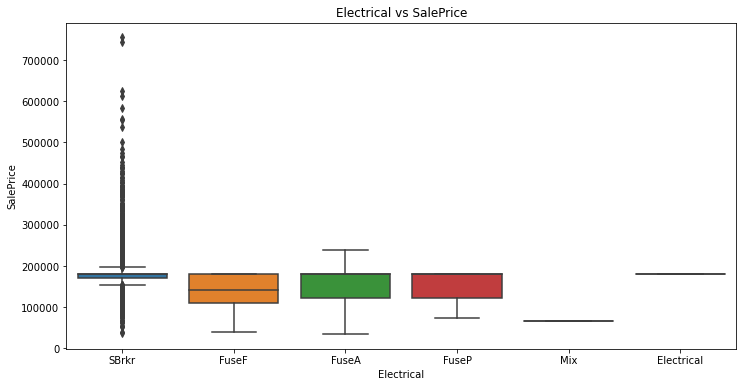

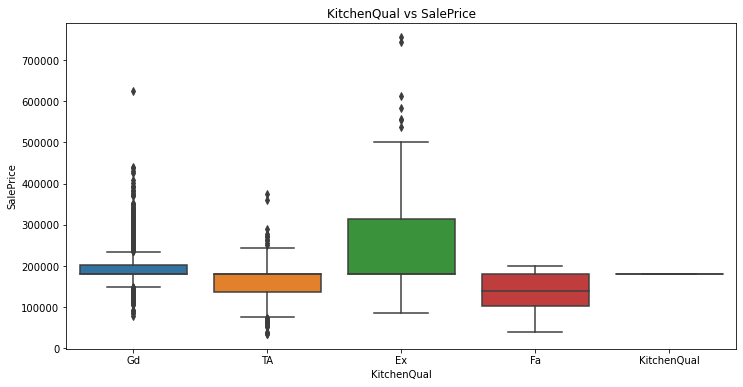

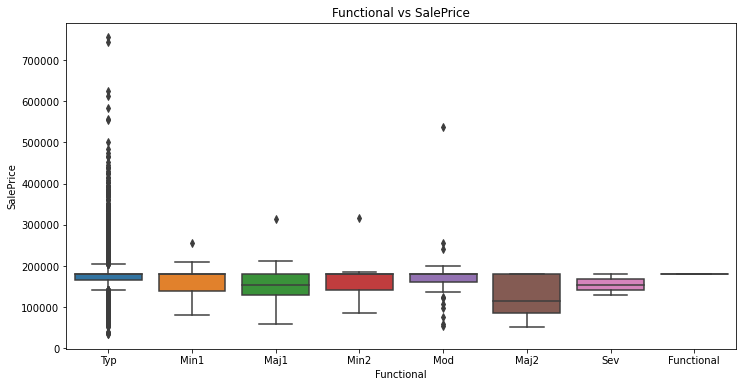

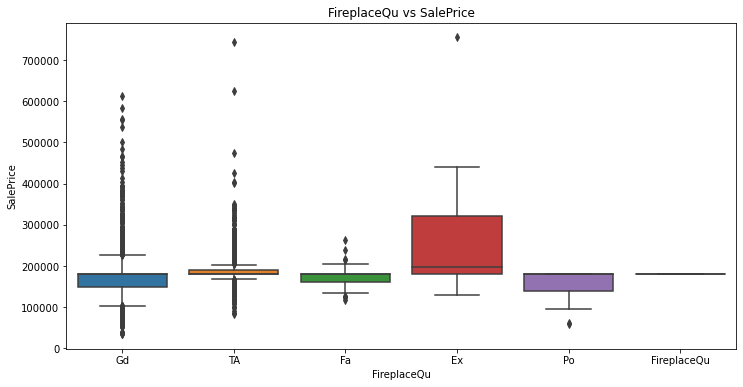

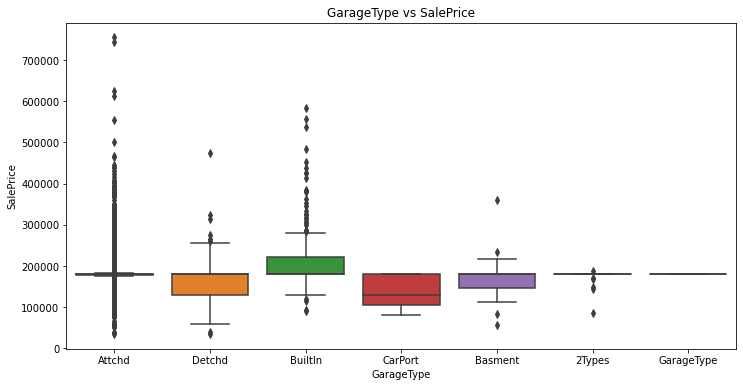

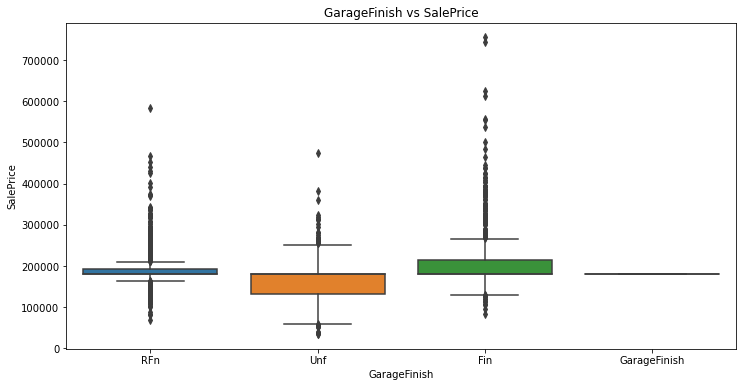

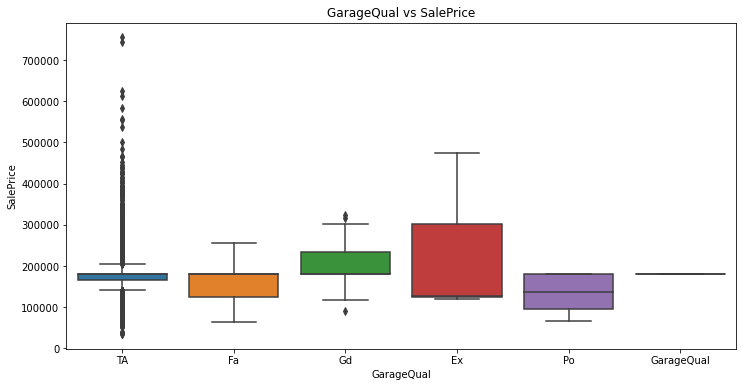

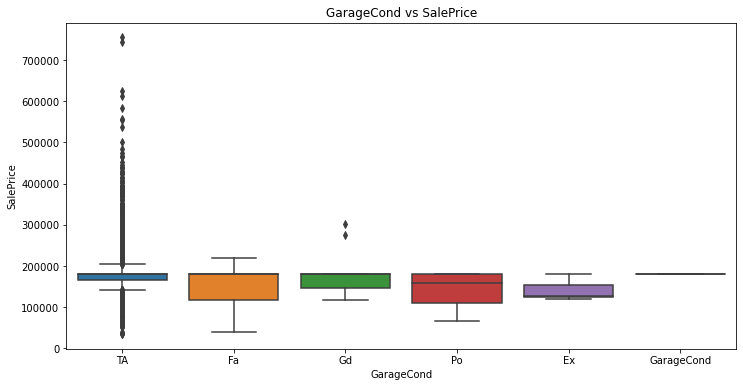

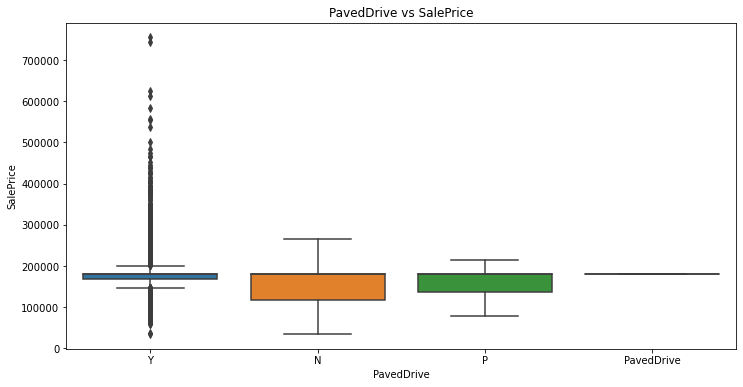

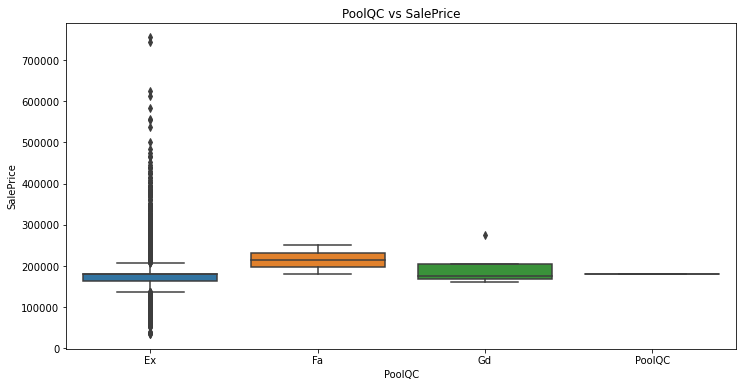

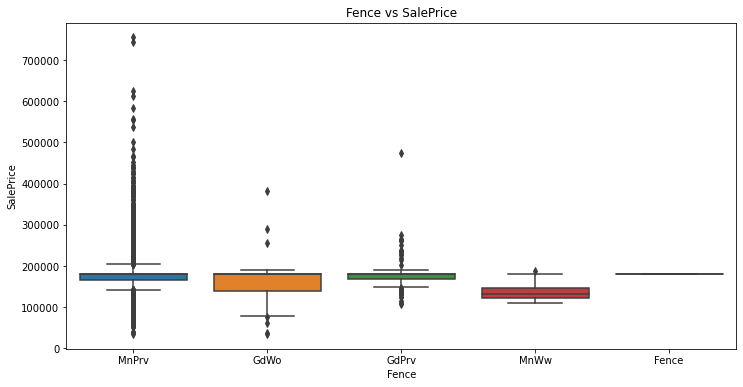

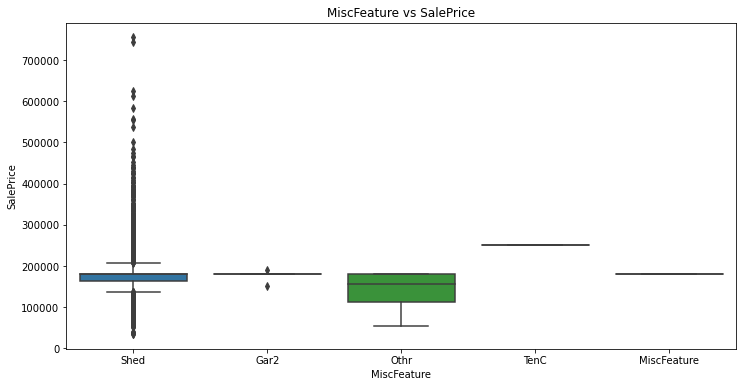

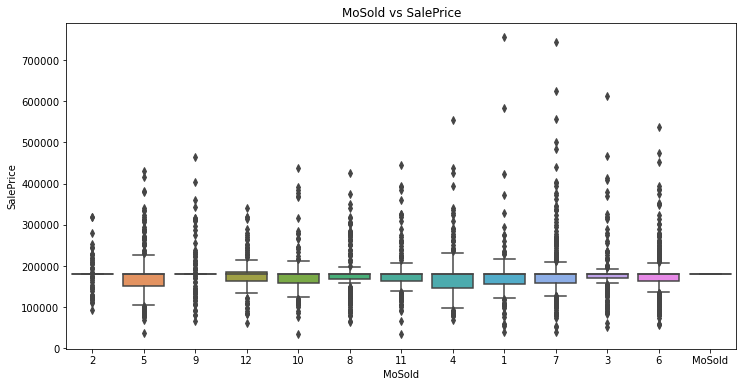

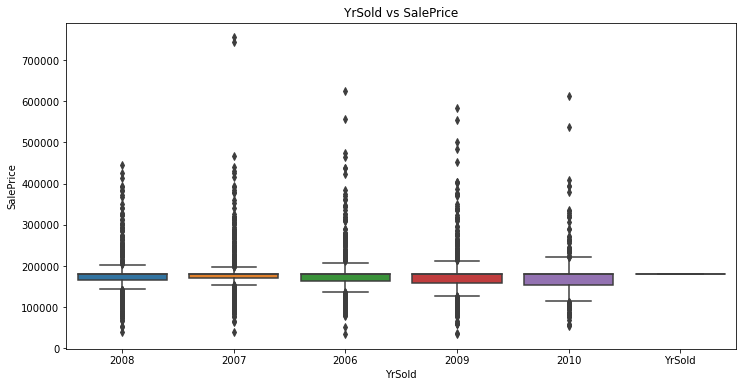

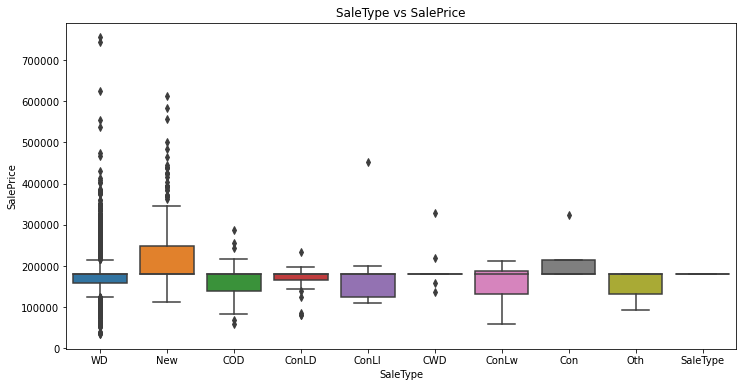

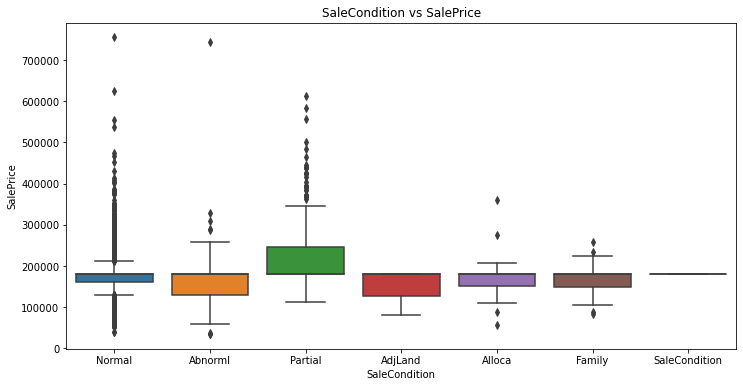

In [13]:
# We're checkign for the outliers using boxplot:

response_var = 'SalePrice' #y variable

# Define a list of categorical variables in the data
cat_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
            'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
            'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
            'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] # all other are x variables

# Create box plots for each categorical variable
for var in cat_vars:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var, y=response_var, data=housing_data)
    plt.title(f'{var} vs {response_var}')
    plt.show()

The box plot reveals a lotof outliers. Next, we'll correct outliers:

In [16]:
import numpy as np
from scipy import stats

df = housing_data

# compute the z-scores for each data point
z_scores = np.abs(stats.zscore(df['SalePrice']))

# define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# identify the outlier indices
outlier_indices = np.where(z_scores > threshold)[0]

# remove the outliers from the dataframe
cleaned_housing_data = df.drop(outlier_indices)


# Encode Categorical data:

In [17]:
#Drop the column "Id":
cleaned_housing_data = cleaned_housing_data.drop('Id', axis=1)

In [18]:
# Again, I'm selecting the categorical columns
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Apply one-hot encoding to the categorical columns
housing_data_encoded = pd.get_dummies(cleaned_housing_data, columns=cat_cols)

# Print the encoded dataset
print(housing_data_encoded.head())


  MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt  \
0         60          65    8450           7           5      2003   
1         20          80    9600           6           8      1976   
2         60          68   11250           7           5      2001   
3         70          60    9550           7           5      1915   
4         60          84   14260           8           5      2000   

  YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2  ... SaleType_Oth  \
0         2003        196        706          0  ...            0   
1         1976          0        978          0  ...            0   
2         2002        162        486          0  ...            0   
3         1970          0        216          0  ...            0   
4         2000        350        655          0  ...            0   

  SaleType_SaleType SaleType_WD SaleCondition_Abnorml SaleCondition_AdjLand  \
0                 0           1                     0                     0   
1     

In [19]:
housing_data_encoded.dtypes

MSSubClass                     object
LotFrontage                    object
LotArea                        object
OverallQual                    object
OverallCond                    object
                                ...  
SaleCondition_Alloca            uint8
SaleCondition_Family            uint8
SaleCondition_Normal            uint8
SaleCondition_Partial           uint8
SaleCondition_SaleCondition     uint8
Length: 332, dtype: object

In [21]:
#Some fields remain unencoded. So, we're applying label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform the non-numeric column to numeric values
housing_data_encoded['MSSubClass'] = le.fit_transform(housing_data_encoded['MSSubClass'])

In [22]:
#Again, some fields remain unencoded. So, we're applying label encoder: Select all object columns
object_cols = housing_data_encoded.select_dtypes(include=['object']).columns

# Apply label encoder on object columns
label_encoder = LabelEncoder()
for col in object_cols:
    housing_data_encoded[col] = label_encoder.fit_transform(housing_data_encoded[col].astype(str))


In [23]:
housing_data_encoded.dtypes

MSSubClass                     int64
LotFrontage                    int64
LotArea                        int64
OverallQual                    int64
OverallCond                    int64
                               ...  
SaleCondition_Alloca           uint8
SaleCondition_Family           uint8
SaleCondition_Normal           uint8
SaleCondition_Partial          uint8
SaleCondition_SaleCondition    uint8
Length: 332, dtype: object

# Apply Feature Scalling:

In [24]:
# merge the new column with the sales data from original DataFrame
data = pd.concat([housing_data_encoded, housing_data['SalePrice']], axis=1)

# Select the numerical features
numerical_features = housing_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create a scaler object for standard scaling
scaler = StandardScaler()

# Scale the numerical features using standard scaling
housing_data_scaled = scaler.fit_transform(data)


# Applying PCA to reduce dimensions

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# We're applying PCA with 2 components and print the explained variance ratio.


data = housing_data

# Extract the SalePrice column
y = data['SalePrice']

# Drop the non-numerical columns
data = data.drop(['Id', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
                  'SaleCondition', 'SalePrice'], axis=1)

# Label encode the remaining categorical columns
label_enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_enc.fit_transform(data[col])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)



[0.13766039 0.07583021 0.05814736]


The variance explained by each principal component tells us how much of the total variance in the data is accounted for by that component. In this case, the first principal component explains 13.77% of the total variance in the data, while the second principal component explains 7.58% of the total variance. The percentage of variance explained by the principal components is relatively small.  We assumetTHis is probably because the data has level of noise or random variation, which can reduce the ability of the principal components to capture meaningful variation in the data.

We could have used the result of the above pca in regression, but the interpretation is going to be difficult. So, we result to using the original data

# Applying Regression

In [41]:
data = housing_data_encoded

# Split data into explanatory and target variables
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# using the constant term
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.776
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.24e-205
Time:                        20:41:40   Log-Likelihood:                -33712.
No. Observations:                2864   AIC:                         6.792e+04
Df Residuals:                    2617   BIC:                         6.939e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [44]:
#From the model summary above, the following are the significant variables at 0.01 significant level:
# get p-values from model summary
p_values = model.pvalues

# filter variables with p-value less than 0.01
significant_vars = p_values[p_values < 0.01].index.tolist()

# print significant variables
print("Significant variables with p-value less than 0.01:")
print(significant_vars)


Significant variables with p-value less than 0.05:
['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'HouseStyle_1.5Unf', 'Exterior1st_VinylSd', 'Exterior2nd_Other', 'MasVnrType_Stone', 'Heating_GasA', 'KitchenQual_Ex', 'PavedDrive_N', 'Fence_MnPrv']


For every LotFrontage, there's increase of 98.29 in SalePrice
For every increase in Overall quality, there's an increase of 3411.5 in SalePrice
For every increase in Overall condition, there's an increase of 3112.4 in SalePrice
And that applies to the other variables....

In [ ]:
Moving further:

# Applying Lasso Regression

In [45]:

# Separate the response variable from the predictors
data = housing_data_encoded
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = lasso.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 36195.62133978851


/Users/ridhwaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.453e+11, tolerance: 4.038e+08
  model = cd_fast.enet_coordinate_descent(


# Applying Decision Tree

In [46]:

# Separate the response variable from the predictors
data = housing_data_encoded
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Fit the model on the data
dt_regressor.fit(X, y)

# Use the trained model to make predictions
y_pred = dt_regressor.predict(X)

# Compute the root mean square error
rmse = np.sqrt(mean_squared_error(y, y_pred, squared=False))

# Print the root mean square error
print('Root Mean Square Error:', rmse)


Root Mean Square Error: 28.381597437154475


# Applying random forest

In [47]:

# Separate the response variable from the predictors
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

# Print the root mean squared error
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 186.0595515181424


# Applying XGBoost

In [49]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = housing_data_encoded

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f'RMSE: {rmse}')


RMSE: 184.5632033887153
